In [17]:
import PIL.Image as pimg
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import vidlu.transforms.image as vti
import vidlu.modules.functional as vmf

def show(x, title=""):
    plt.figure()
    plt.title(title)
    plt.imshow(vti.chw_to_hwc(x[0]).to(dtype=torch.uint8))

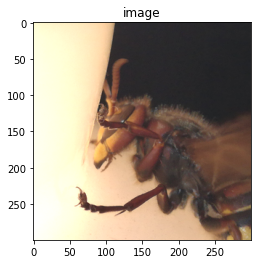

In [18]:
im = pimg.open("hornet.png")
x = vti.hwc_to_chw(vti.pil_to_torch(im)).float().unsqueeze(0)

show(x, "image")

torch.Size([1, 300, 300, 2])
1.0 0.996666669845581


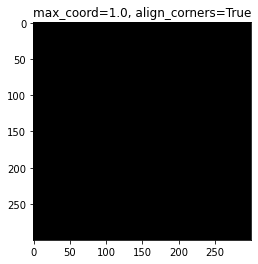

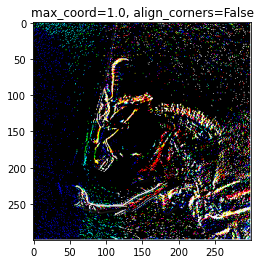

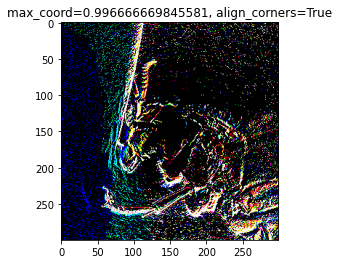

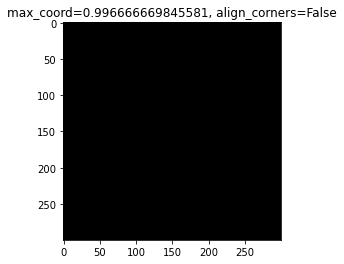

In [34]:
grid1 = vmf.grid_2d(1, *im.size)  # (-1, -1) to (1, 1)
grid2 = F.affine_grid(torch.eye(2, 3)[None, ...], size=x.shape, align_corners=False)  # (-1 + 0.5/H, -1 + 0.5/W) to (1 - 0.5/H, 1 - 0.5/W)
print(grid2.shape)

#assert torch.all(torch.isclose(grid2, grid1 * (1 - 0.5/x.shape[2]*2)))
print(grid1.max().item(), grid2.max().item())

for gr in [grid1, grid2]:
    for align_corners in [True, False]:
        x_s = F.grid_sample(x, gr, align_corners=align_corners)
        max_coord = gr.max().item()
        show(x_s - x, f"{max_coord=}, {align_corners=}")

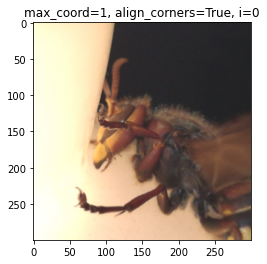

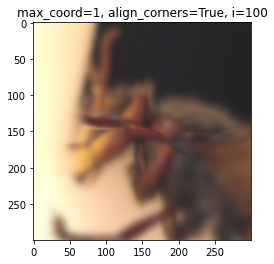

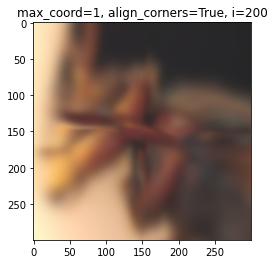

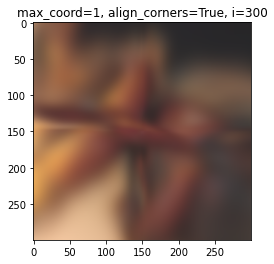

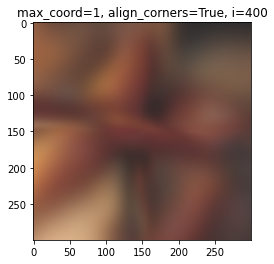

In [33]:
align_corners = True
x_s = F.grid_sample(x, gr, align_corners=align_corners)
for i in range(500):
    x_s = F.grid_sample(x_s, gr, align_corners=align_corners)
    if i % 100 == 0:
        show(x_s, f"max_coord=1, {align_corners=}, {i=}")